In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from scipy import stats
from sklearn.metrics import confusion_matrix

pathName = 'C:\\Users\\singh\\OneDrive\\Desktop\\Courses\\Spring-20 Courses\\Klaviyo Data Science challenge\\'
df = pd.read_csv(pathName +  'screening_exercise_orders_v201810.csv')

### A-1) Assemble a dataframe with one row per customer and the following columns:*customer_id * gender * most_recent_order_date * order_count (number of orders placed by this customer)

### A-2) Sort the dataframe by customer_id ascending and display the first 10 rows.

In [2]:
#A-1
df["date"] = pd.to_datetime(df["date"]) #converting date column to date-time
df['order_count'] = df.groupby(['customer_id'])['customer_id'].transform('count') # adding new column named order_count
df1 = df 
df1 = df1.sort_values('date').drop_duplicates('customer_id',keep='last').reset_index() #sorting according to date to get the most recent order date
columns_needed =  ['customer_id','gender','date','order_count']
for i in df1:
    if i not in columns_needed:
        df1 = df1.drop(i,axis=1) # dropping unnecessary columns
    else:
        if i == 'date':
            df1 = df1.rename(columns={"date": "most_recent_order_date"}) # renaming date to most_recent_order_date
#A-2
df1 = df1.sort_values(by=['customer_id']).reset_index(drop=True)
df1.head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


### B) Plot the count of orders per week for the store.

   week_no  order_count
0        1          108
1        2          162
2        3          260
3        4          140
4        5          148


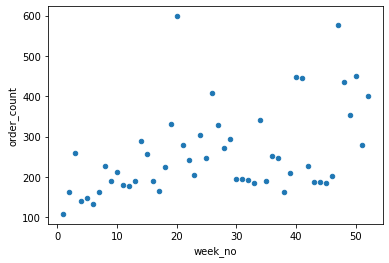

In [3]:
#B
df2 = df1.loc[:, ["order_count"]] # creating a new dataframe df2 to get order_count column from df1
df2["week_no"] = pd.to_datetime(df1["most_recent_order_date"]).dt.week #converting date-time column to weeks and adding it to df2
df3 = df2.groupby("week_no").sum().reset_index() # creating new dataframe df3 by grouping by week_no column and summing order_count
print(df3.head())
df3.plot.scatter(x="week_no", y="order_count") # graph plot

### C-1) Compute the mean order value for gender 0 and for gender 1

In [4]:
#c-1
df4 = df.groupby('gender', as_index=False)['value'].mean() # creating new dataframe df4 for calculating mean
df4

,gender,value
0,0,363.890006
1,1,350.708361


### C-2) Do you think the difference is significant? Justify your choice of method.

I used independent t-test (two sample test) to check for the statistical significance because we have 2 unrelated groups, gender_0 and gender_0, and we have to check whether there is statistically significant difference between the means of these two groups. I have assumed the significance level alpha = 0.05 and alpha = 0.01.

<Figure size 1440x720 with 0 Axes>

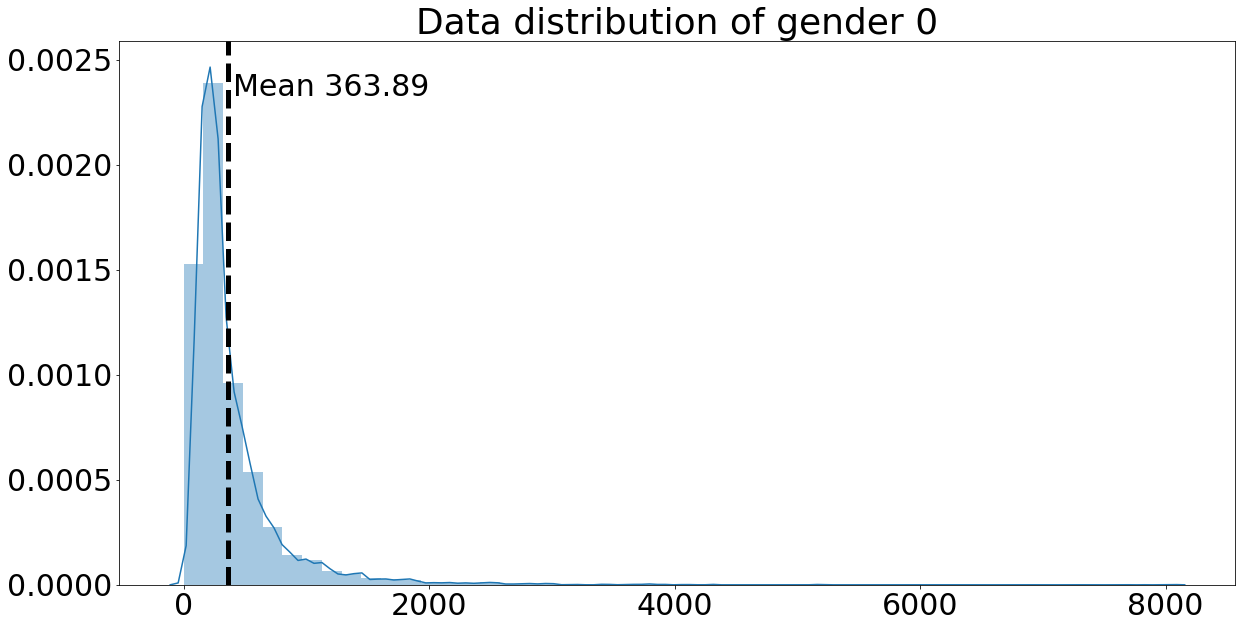

<Figure size 1440x720 with 0 Axes>

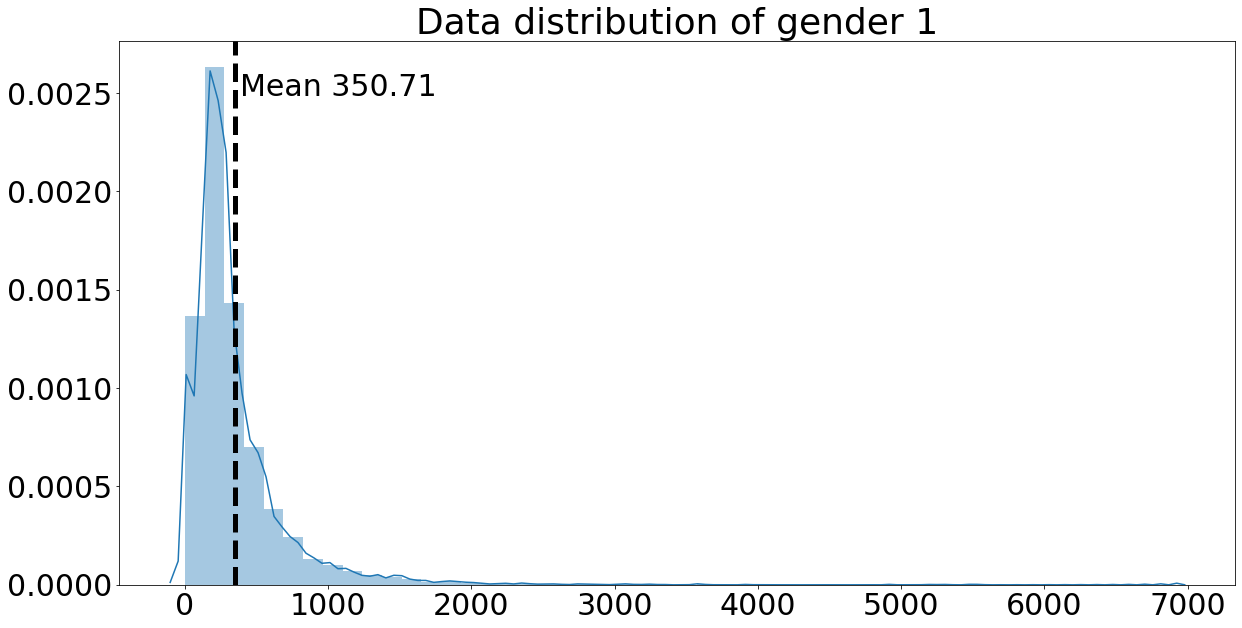

<Figure size 1440x720 with 0 Axes>

In [5]:
#c-2
arr_0 = np.array(df.loc[df['gender'] == 0, 'value'].to_list()) #array of value column when gender column = 0
arr_1 = np.array(df.loc[df['gender'] == 1, 'value'].to_list()) #array of value column when gender column = 1

#plotting graph of data distribution of the arr_0 and arr_1
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set
def plot_distribution(inp,label): # plot for visualizing the distribution of our two inputs
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp),color='k',linestyle='dashed',linewidth = 5)
    _,max_ = plt.ylim()
    plt.text(inp.mean() + inp.mean()/10,max_ - max_/10,'Mean {:.2f}'.format(inp.mean()),)
    plt.title(f'Data distribution of {label}')
    return plt.figure()
plot_distribution(arr_0,'gender 0') # for visualizing data distribution of arr_0
plot_distribution(arr_1,'gender 1') #for visualizing data distribution of arr_1

In [6]:
#calcuated t statistics from scratch
N0 = len(arr_0) # length of arr_0
N1 = len(arr_1) # length of arr_1
mean_0, mean_1 = np.mean(arr_0), np.mean(arr_1)  # mean calulations
std_0, std_1 = np.std(arr_0, ddof=1), np.std(arr_1, ddof=1) # standard deviation calulations
std_err_0, std_err_1 = std_0/np.sqrt(N0), std_1/np.sqrt(N1) #standard error calculations
sed = np.sqrt(std_err_0**2.0 + std_err_1**2.0) # standard error on the difference between the samples
t_stat = (mean_0 - mean_1) / sed # t statistic calcualtion
dgf = N0 + N1 - 2 #degrees of freedom calculation
p = 1 - stats.t.cdf(t_stat,df=dgf) #p value calculation
print("t-statistics using manual calcualtion= " + str(t_stat))
print("P value using manual calcualtion" + str(2*p))
print()
# if alpha = 0.05, as P<alpha, we can say the means are different and the difference is statistically significant (we reject H0)
# if alpha = 0.01, as p>alpha, we can say the difference is not statistically significant (fail to reject H0)

#Cross Checking t statistics values with the internal scipy function
print('Cross checking with scipy function:')
from scipy.stats import ttest_ind
def compare_gender(arr_0,arr_1,alpha):
    stat,p = ttest_ind(arr_0,arr_1)
    print('t-statistics using scipy=%.3f,p value using scipy=%.3f'%(stat,p))
    if p > alpha:
        print('not statistically different (fail to reject H0)')
    else:
        print('statistically different (reject H0)')
print('assuming alpha = 0.05:')
compare_gender(arr_0,arr_1,0.05) #assuming alpha=0.05
print()
print('assuming alpha = 0.01:')
compare_gender(arr_0,arr_1,0.01) #assuming alpha = 0.01

t-statistics using manual calcualtion= 1.976107933576866
P value using manual calcualtion0.04816292672695388

Cross checking with scipy function:
assuming alpha = 0.05:
t-statistics using scipy=1.976,p value using scipy=0.048
statistically different (reject H0)

assuming alpha = 0.01:
t-statistics using scipy=1.976,p value using scipy=0.048
not statistically different (fail to reject H0)


### D-1) Generate a confusion matrix for the gender predictions of customers in this dataset.

<Figure size 1440x720 with 0 Axes>

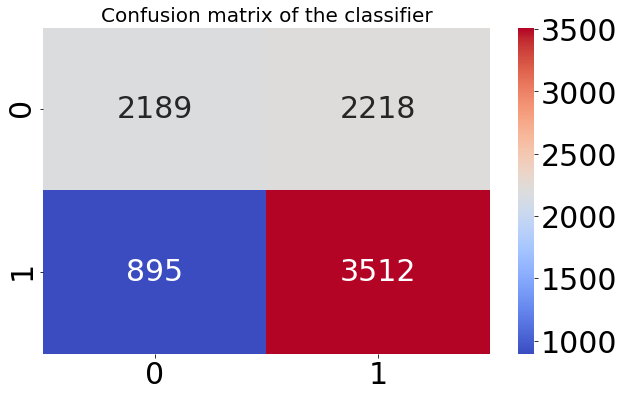

true negative: 2189
False positive: 2218
False negative: 895
true positive: 3512

accuracy: 0.6468118901747221


In [7]:
df5 = df.drop_duplicates('customer_id') # new dataframe df5 with unique categorical values
actual_gender = np.array((df5['gender']).to_list()) #array of actual gender column
predicted_gender = np.array((df5['predicted_gender']).to_list()) #array of predicted gender column)

#plotting confusion matrix
fig = plt.figure()
disp = confusion_matrix(actual_gender, predicted_gender)
plt.figure(figsize=(10, 6))
sns.heatmap(disp, annot=True,cmap='coolwarm',fmt="g") 
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Confusion matrix of the classifier',fontsize=20)
labels = ['0', '1']
plt.show()

# calculating values of true negative (tn),false positive (fp),false negative (fn) and true positive (tp)
tn, fp, fn, tp = confusion_matrix(actual_gender, predicted_gender).ravel()
print(f'true negative:',tn)
print(f'False positive:',fp)
print(f'False negative:',fn)
print(f'true positive:',tp)
print()

#accuracy of gender predictions
accuracy = (tn +tp)/(tn+fp+fn+tp)
print(f'accuracy:',accuracy)

### D-2) does the confusion matrix tell you about the quality of the predictions?

D-2
confusion Matrix gives us the summary of prediction results. It basically tells us correct and incorrect predictions broken down by each class. In our case, our model classified 2218 instance as 1 but in reality they were 0 (false positive), 895 instances as 0 but in reality they were 1 (false negative), 2189 times it correctly predicted 0 (true negative) and 3512 times it correctly predicted 1 (true positive). More the number of true positives and true negative more robust our model is as it would predict more instances correctly. We got an accuracy of 64.68% (i.e our model was able to predict correctly 64.68% of the time)

Accuracy might not always be the right measure. We can also calulate different evaluation metrics like precision, recall and F-F-score (each used for different problem statements) using confusion matrix. 

### E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem.

Ans) One of my favorite Machine Learning technique which I have used in numerous projects and assignments is K-means clustering. I used K-means clustering for the first time while I was working for Drillinginfo. There are few variables like oil pressure, productivity, current, voltage, and power which decide the working conditions of the wells.If we can detect the wells in bad working condition, it is necessary for us to restore them to normal condition in first time to ensure the productivity. I divided oil wells into several clusters using these variables, so that whenever we analyze specific well to see what can be done to improve the efficiency, the adjustment operations can also be applied to nearby wells in the same cluster. This helped our client cut down the total time of well inspection to one third of the initial time and made it easier to manage wells and hence, detect the wells in bad working conditions.